In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

In [4]:
import pandas as pd

# Number of sides in the polygon:

In [5]:
n = 6

# Angles subtended by each side at the centre of the polygon:

In [6]:
eta = (2*np.pi/n)

# Circumradius of polygon:

In [7]:
Circum_R = 10

In [8]:
l_1 = ((2*(Circum_R**2)*(1-(np.cos(eta))))**0.5)/2

In [9]:
l_1

4.999999999999999

In [10]:
edge_angle = np.pi - eta

In [11]:
l_side = (2*(l_1**2)*(1-np.cos(edge_angle)))**0.5

In [12]:
l_side

8.660254037844386

In [13]:
l_m = (2*(l_1**2)*(1-np.cos(eta)))**0.5

In [14]:
l_m

4.999999999999998

In [15]:
R_1_max = Circum_R

In [16]:
R_2_max = Circum_R*np.sin((np.pi-eta)/2)

In [17]:
R_3_max = Circum_R - l_m

In [18]:
R_1_min = l_side

In [19]:
R_2_min = l_1

In [20]:
R_3_min = 0

In [21]:
T = 1

In [22]:
dt = T/10

In [23]:
R_1_dot = (R_1_max-R_1_min)/T

In [24]:
R_2_dot = (R_2_max-R_2_min)/T

In [25]:
R_3_dot = (R_3_max-R_3_min)/T

In [26]:
theta = 0
theta_m = -eta/2

In [27]:
R_1_x = []
R_1_y = []
R_2_x = []
R_2_y = []
R_3_x = []
R_3_y = []

In [28]:
def plotter(R_1,R_2,R_3,N):
    plt.figure(figsize=(7,7))
    theta = 0
    theta_m = -eta/2
    for i in range(2*n):
        X = []
        Y = []
        theta = theta + eta

        theta_m = theta_m + eta

        x = R_3*np.cos(theta_m-(eta/2))
        y = R_3*np.sin(theta_m-(eta/2))
        plt.plot(x,y,"ro")
        X.append(x)
        Y.append(y)
        if (i == 0):
            R_3_x.append(x)
            R_3_y.append(y)

        x = R_2*np.cos(theta_m)
        y = R_2*np.sin(theta_m)
        plt.plot(x,y,"bo")
        X.append(x)
        Y.append(y)
        if (i == 0):
            R_2_x.append(x)
            R_2_y.append(y)

        x = R_1*np.cos(theta)
        y = R_1*np.sin(theta)
        plt.plot(x,y,"go")
        X.append(x)
        Y.append(y)
        if (i == 0):
            R_1_x.append(x)
            R_1_y.append(y)


        plt.plot(X,Y)
        plt.xlim(-15,15)
        plt.ylim(-15,15)

    theta = 0
    theta_m = eta/2

    for i in range(2*n):
        X = []
        Y = []
        theta = theta + eta

        theta_m = theta_m + eta

        x = R_3*np.cos(theta_m+(eta/2))
        y = R_3*np.sin(theta_m+(eta/2))
        plt.plot(x,y,"ro")
        X.append(x)
        Y.append(y)
        # R_3_x.append(x)
        # R_3_y.append(y)

        x = R_2*np.cos(theta_m)
        y = R_2*np.sin(theta_m)
        plt.plot(x,y,"bo")
        X.append(x)
        Y.append(y)
        # R_2_x.append(x)
        # R_2_y.append(y)

        x = R_1*np.cos(theta)
        y = R_1*np.sin(theta)
        plt.plot(x,y,"go")
        X.append(x)
        Y.append(y)
        # R_1_x.append(x)
        # R_1_y.append(y)

        plt.plot(X,Y)
        plt.xlim(-15,15)
        plt.ylim(-15,15)

    plt.grid()
    plt.savefig(f"Hob_{N}.png")
    plt.show()

In [29]:
T_steps = int(T/dt)

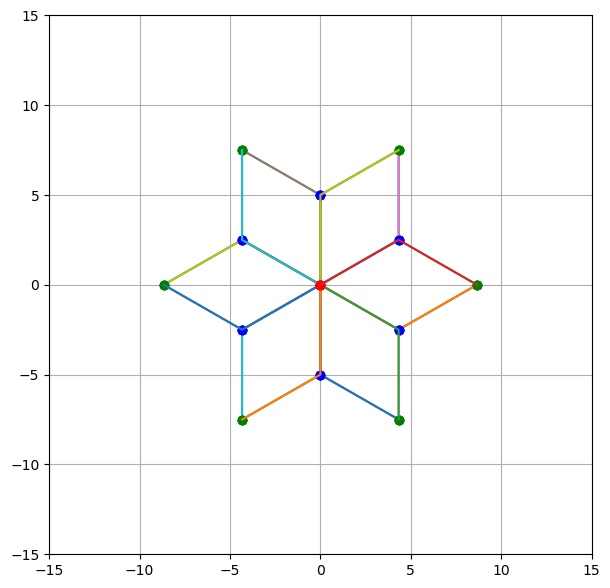

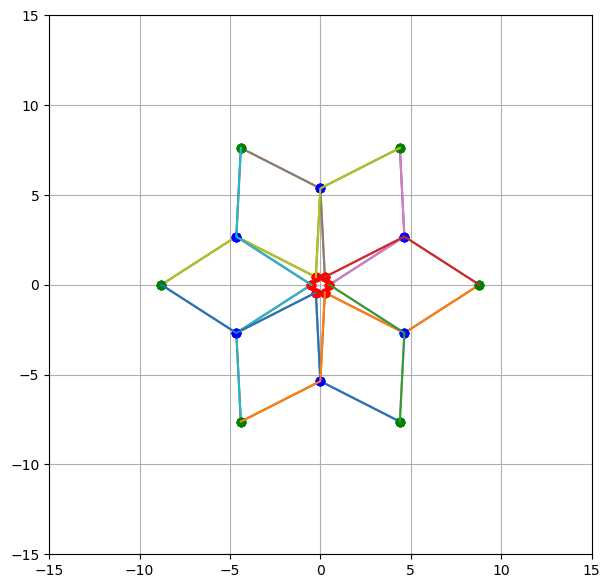

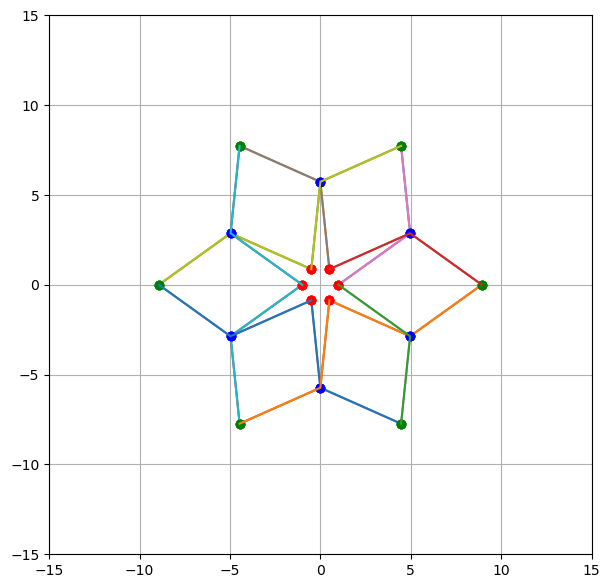

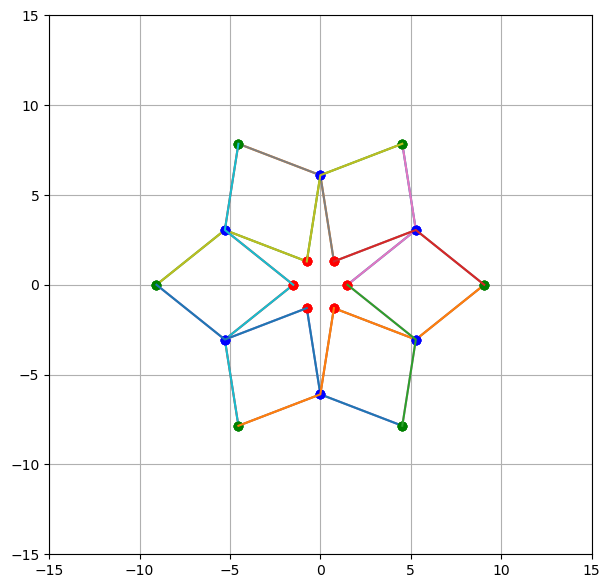

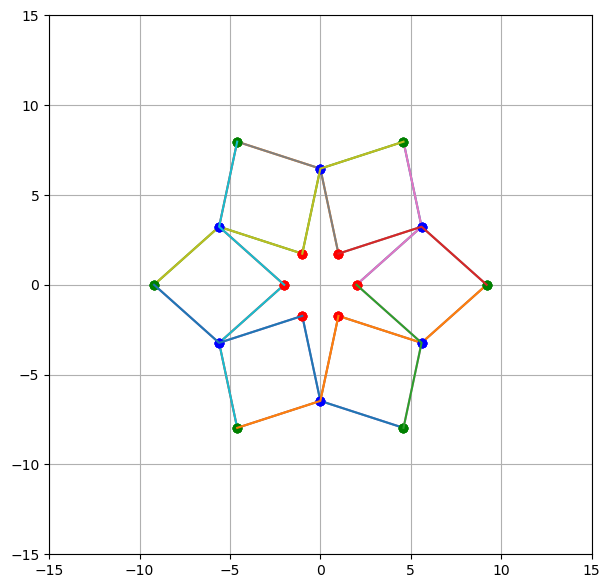

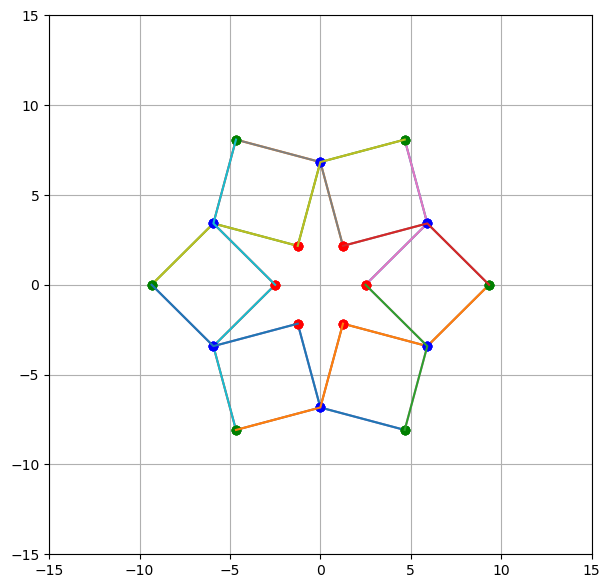

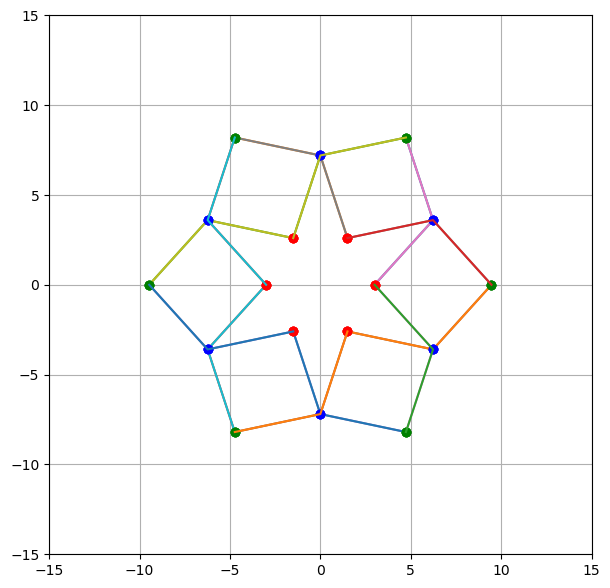

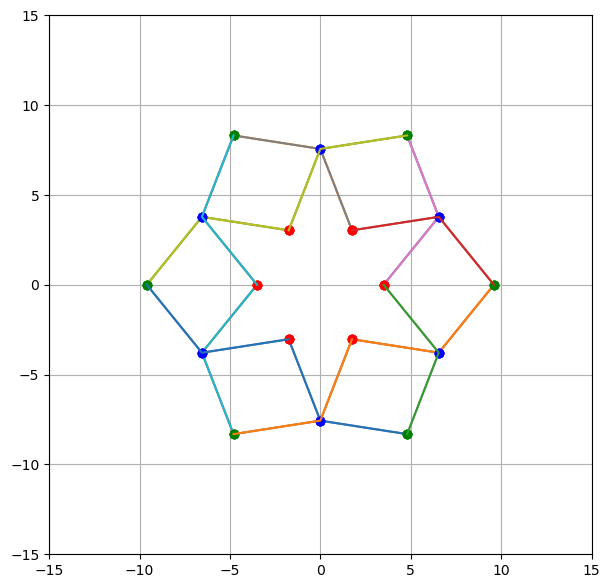

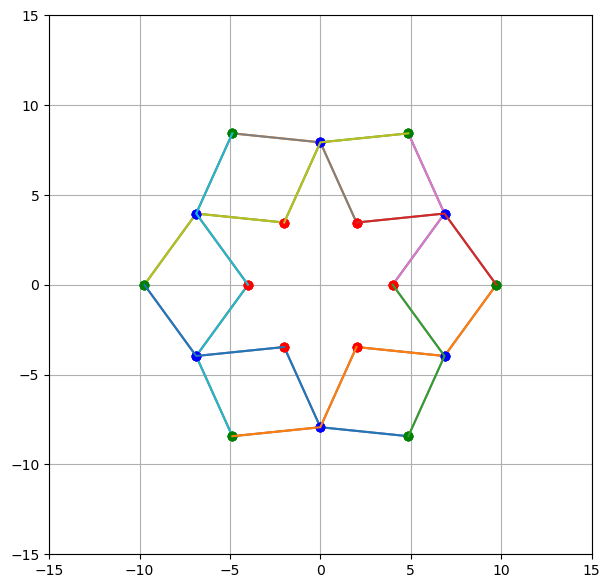

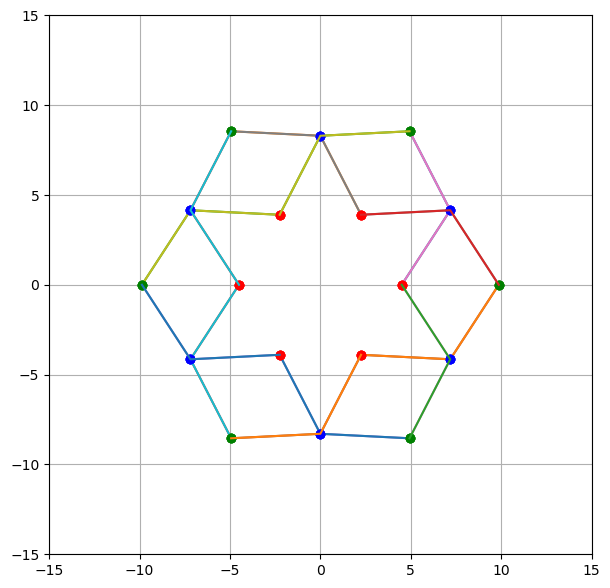

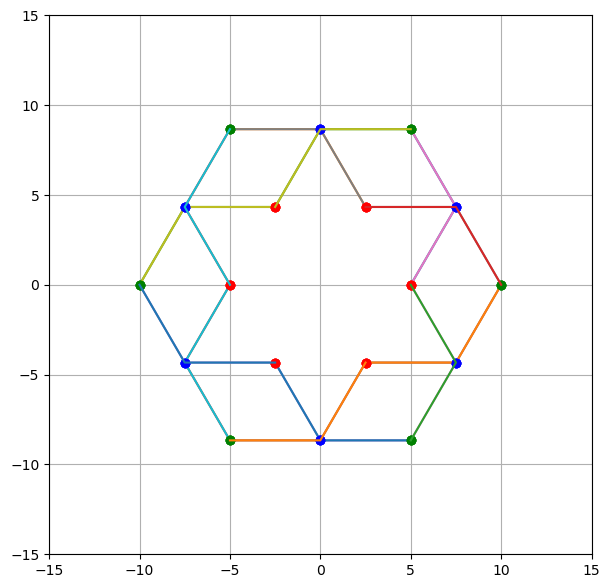

In [30]:
for i in range(T_steps+1):
    R_1 = R_1_min + (i*R_1_dot*dt)
    R_2 = R_2_min + (i*R_2_dot*dt)
    R_3 = R_3_min + (i*R_3_dot*dt)
    plotter(R_1,R_2,R_3,i)

In [31]:
Image_Files = []

In [32]:
Image_Files = []
for i in range(100):
    if (i//(T_steps+1))%2 == 0:
        Image_Files.append(f"Hob_{i%(T_steps+1)}.png")
    if (i//(T_steps+1))%2 == 1:
        Image_Files.append(f"Hob_{(T_steps)-(i%(T_steps+1))}.png")

In [33]:
animation = ImageSequenceClip(Image_Files, fps=15)
animation.write_videofile(f"Movie_{n}.mp4")

Moviepy - Building video Movie_6.mp4.
Moviepy - Writing video Movie_6.mp4



Moviepy - Done !
Moviepy - video ready Movie_6.mp4


In [34]:
R_1_x = pd.DataFrame(R_1_x)
R_2_x = pd.DataFrame(R_2_x)
R_3_x = pd.DataFrame(R_3_x)
R_1_y = pd.DataFrame(R_1_y)
R_2_y = pd.DataFrame(R_2_y)
R_3_y = pd.DataFrame(R_3_y)

# Writing data to a file:

In [35]:
R_1_x.to_csv("R_1_x.csv",header= False,index=False)
R_2_x.to_csv("R_2_x.csv",header= False,index=False)
R_3_x.to_csv("R_3_x.csv",header= False,index=False)
R_1_y.to_csv("R_1_y.csv",header= False,index=False)
R_2_y.to_csv("R_2_y.csv",header= False,index=False)
R_3_y.to_csv("R_3_y.csv",header= False,index=False)